In [ ]:
try:
    import rr
except ModuleNotFoundError:
    import sys
    import os
    path = list(filter(lambda p: p.endswith('site-packages'), sys.path))[0]
    parts = path.split(os.sep)
    new_parts = []
    for part in parts:
        if part == 'lib':
            break
        new_parts.append(part)
        path = os.sep.join(new_parts + ['bin', 'pip3'])
    print(f'Try running this in a new cell: !{path}', 'install -U result-reporter --index-url=https://pypi.org/simple')

rr.set_global_endpoint('https://result-reporter.com/ingest')
rr.set_global_token('35d6e74d-2b37-4d48-aea5-d1fdd663aa65')

**Intro**

This notebook should be treated more as lecture notes than an exercise set. It covers the basics of Pandas and provides some challenges along the way. 

**Challenge**

Complete the challenge questions as they appear.

**Data**

https://storage.googleapis.com/columbia-python-bootcamp-ieor/311_Service_Requests.csv.gz (1.4GB) (262M zipped)

# Basics of Pandas

In [ ]:
!pip install pandas

In [ ]:
# Let's talk about the dangers of pip. 
# And the storage of data within Pandas.
    # One package with a security risk and endanger all other dependent packages.
    # Not golf balls on a driving range, but dominos in a domino maze.

### pd.Series

In [3]:
import pandas as pd

In [ ]:
s = pd.Series([1, 2, 3, 4])
s  # Looks like a numpy array with some extra numbers to the left

In [ ]:
s.values  # Really looks like a numpy array

In [ ]:
type(s.values)  # Whelp, its a numpy array

In [ ]:
s.index  # Extra data to helps access and organize data

In [ ]:
s[2]  # Same slicing and indexing operations work on a series

In [ ]:
s[1:]

So why not just use the indexing that we already have? Why index with a Pandas index? We can use things besides numbers for our index keys.

In [ ]:
s = pd.Series([6, 7, 8, 9], index=['a', 'b', 'c', 'd'])
s

In [ ]:
s['b':'d']  # NB. Look at that! Endpoint is included when using named index.

In [ ]:
s = pd.Series({
    'b': 4,
    'c': 2,
    'a': 1,
    'd': 0,
})  # Can toss a dictionary into a series construtor and the keys will be used to create the index!
s

In [ ]:
s.index  # Notice: not a RangeIndex. RangeIndex is something special that Pandas uses an optimization when it can.

In [ ]:
s = pd.Series(['Grandma', 'Mom', 'Self', 'Daughter'], index=[-2, -1, 0, 1])
s

In [ ]:
s[1]  # Wait? Shouldn't that return 'Mom'?

Pandas series use their index to look up a value, just like a regular Python *dictionary*. But, to be more explicit, let's use the indexer methods, .loc() and .iloc().

In [ ]:
s.loc[1]  # Look up item by "key" in index

In [ ]:
s.iloc[1]  # Look up item by position in series (Python list style)

There's one more indexer, ix, that we'll talk about when we get through a bit of DataFrame info.

In [ ]:
a = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'f'])
b = pd.Series([5, 6, 7, 8], index=['b', 'c', 'e', 'f'])

a + b  # Some values based on index!

In [ ]:
a / b  # What's a NaN

NaN means Not a Number. When pandas can not perform the mathematical opertation due to missing data, it places a NaN.

In [ ]:
np.NaN + 1

In [ ]:
type(np.NaN)

In [ ]:
np.NaN   # A recognaized number by the IEEE. Thus its understood by a lot of other tools outside of Python.

Sometimes this is okay. Sometimes we don't want any NaNs.

In [ ]:
a.div(b, fill_value=0)  # Fill in missing data with this number...

In [ ]:
pd.Series([1, 2, 3, np.NaN], index=['a', 'b', 'c', 'f']).fillna(4)

In [ ]:
(a / b).dropna()  # Get rid of NaNs all togehter...

In [ ]:
(a / b).isnull()  # NaN is not None (aka. Null)!

Why not use `None`?

Slowness due to forced dtype and loss of certain operations.

In [ ]:
a = np.array([1, 2, None, 3])  # Note: were are using numpy here.
a

In [ ]:
a.sum()  # Errors are produced which is cumbersome at times.

In [ ]:
s = pd.Series([1, 2, None, 3])  # Pandas automatically converts None to a NaN
s

In [ ]:
s = pd.Series([1, 2, None, 3])
%timeit s.sum()  # Fun demo of just how fast this works.

In [ ]:
s = pd.Series([1, 2, 3, 4])
%timeit s.sum()  # Fun demo of just how fast this works.

To sum up, Series are numpy arrays with an index object and extra methods to ease usage of the array.

In [ ]:
def sum_by_key(d1: dict, d2: dict) -> pd.Series:
    """
    Return a pd.Series object with k/v pairs summed by key.
    
    Drop any keys that do not occur in both dicts.
    """
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
### BEGIN TESTS
with rr.Wrap(sum_by_key) as func:
    result = func(
        {
            'cats': 4,
            'dogs': 2,
            'fish': 1,
        },
        {
            'cats': 0,
            'dogs': 4,
            'rats': 1,
        },
    )
    assert result.equals(pd.Series([4.0, 6.0], index=['cats', 'dogs'])), result
### END TESTS

### pd.DataFrame

The spreadsheet equivalent.

If we think of a series as a column, a DataFrame is a collection of columns side by side. These columns also share the same index!

In [ ]:
import pandas as pd

In [ ]:
# Stock data
GOOG = pd.Series({
    '2019-07-01': 1080,
    '2019-04-01': 1194,
    '2019-01-01': 1045,
    '2018-10-01': 1195,
})

AAPL = pd.Series({
    '2019-07-01': 197,
    '2019-04-01': 191,
    '2019-01-01': 157,
    '2018-10-01': 227,
})

stocks = {
    'GOOG': GOOG,
    'AAPL': AAPL,
}

stocks

In [ ]:
df = pd.DataFrame(stocks)
df

In [ ]:
df['2018-10-01']  #  Can't index by row index anymore...

In [ ]:
df['GOOG']

In [ ]:
type(df['GOOG'])  # Its a series

In [ ]:
df['GOOG']['2018-10-01']  # Index into the outer dictionary first (the columns), then we can slice into the rows

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

### DataFrame operations

In [ ]:
df  # Remind ourselves of df.

In [ ]:
df.T  # Transpose!

In [ ]:
df  # Doesn't update our original dataframe! Creates a new one.

In [ ]:
df['GOOG'] - df['GOOG'].mean()

In [ ]:
df['GOOG-diff-from-mean'] = df['GOOG'] - df['GOOG'].mean()
df  # Not standard dev! 

In [ ]:
# Let's find all the times GOOG was greater than its average in another way.
slice_ = df['GOOG'] > df['GOOG'].mean()  
slice_

In [ ]:
type(slice_)

In [ ]:
df[slice_]
# Wait shouldn't that first argument to an index operation operate on columns? Like df['GOOG']?
# Series are special when passed to a Dataframe indexing operation; they act on rows.

In [ ]:
df.columns = ['GOOG', 'AAPL', 'GOOG-dfm']  # Change column names
df

In [ ]:
df.columns # Pandas converts it back to a index for us! Nice!

In [ ]:
# Need to specify the axis (0 for rows, 1 for columns) and 
# note that it returns a copy of the DataFrame.
df.drop(['GOOG-dfm'], axis=1)

In [ ]:
df # Still there!

In [ ]:
df = df.drop(['GOOG-dfm'], axis=1)
df

In [ ]:
df2 = pd.DataFrame({
    'AMZN': pd.Series([1817, 1584], index=['2018-07-01', '2018-04-01']),
    'MSFT': pd.Series([133, 101], index=['2019-07-01', '2019-01-01']),
})
df2  # Pandas fills

In [ ]:
df2.fillna(-1, inplace=True)  # Fill and drop methods operate on whole DataFrame
df2

In [ ]:
pd.concat([df, df2])

In [ ]:
pd.merge(df, df2, left_index=True, right_index=True)  # Use indexes as join keys.

In [ ]:
pd.merge(df, df2, left_index=True, right_index=True, how='outer')  # Need to include all rows (ie. outer join)

### Practical Problem

We've been tasked with figuring out how to make life better for NYC citizens. 

In [4]:
import pathlib

# Change Me!
EXERCISE_DATA_PATH = pathlib.Path('/Users/paul/Downloads/311_Service_Requests.csv.gz')

In [5]:
df = pd.read_csv(
    EXERCISE_DATA_PATH,  # This could be a URL! Please don't for this class. Keep my costs down.
    compression='gzip',
    low_memory=False,  # Speed up by loading file in chunks.
) # Only 30s to load

Draw backs to using a URL? Pandas will fetch the data every time the cell executes. I like to re-eval a cell often and this can cause significant delays in my work with larger datasets. Some APIs will even reject requests if you request from them
too frequently.

In [6]:
df.head(50)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45282225,01/01 12:01:12 AM,01/01 03:07:10 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11210.0,511 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.637989,-73.950108,"(40.63798926915675, -73.95010786310772)"
1,45281175,01/01 12:01:37 AM,01/01 01:54:21 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10468.0,2625 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865154,-73.895088,"(40.865154176445884, -73.89508805180566)"
2,45278238,01/01 12:01:46 AM,01/01 05:37:46 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,NaN,10025.0,865 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.796930,-73.964551,"(40.79692992181987, -73.96455113216999)"
3,45280733,01/01 12:01:56 AM,01/01 07:48:16 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11103.0,25-88 46 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.765270,-73.907281,"(40.76527048266495, -73.90728109315764)"
4,45281554,01/01 12:03:23 AM,01/01 05:24:53 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11222.0,211 INDIA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.732665,-73.951101,"(40.73266510004759, -73.95110140096469)"
5,45283785,01/01 12:03:34 AM,01/01 12:03:35 AM,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,10016.0,513 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.741410,-73.978348,"(40.74140999463676, -73.97834783864802)"
6,45279341,01/01 12:03:45 AM,01/01 02:02:26 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,894 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698003,-73.937080,"(40.69800293380301, -73.93708011114347)"
7,45278281,01/01 12:04:16 AM,01/01 06:49:27 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11221.0,40 STARR STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700893,-73.927257,"(40.700892874079585, -73.92725688032714)"
8,45288075,01/01 12:04:45 AM,01/03 02:12:58 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11238.0,420 CLINTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685645,-73.967333,"(40.68564482086869, -73.96733257810193)"
9,45279489,01/01 12:04:47 AM,01/01 04:22:13 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11223.0,1906 WEST 13 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.599967,-73.984872,"(40.599967258222144, -73.98487199397107)"


In [7]:
df.shape  # Well above max number of rows in an excel spreadsheet, 1,048,576 rows.

(2591270, 41)

Loading the same data in my local version of Excel resulted in a two minute freeze of Excel followed by this warning:

<details>
    <summary><strong>Excel Error</strong></summary>
    
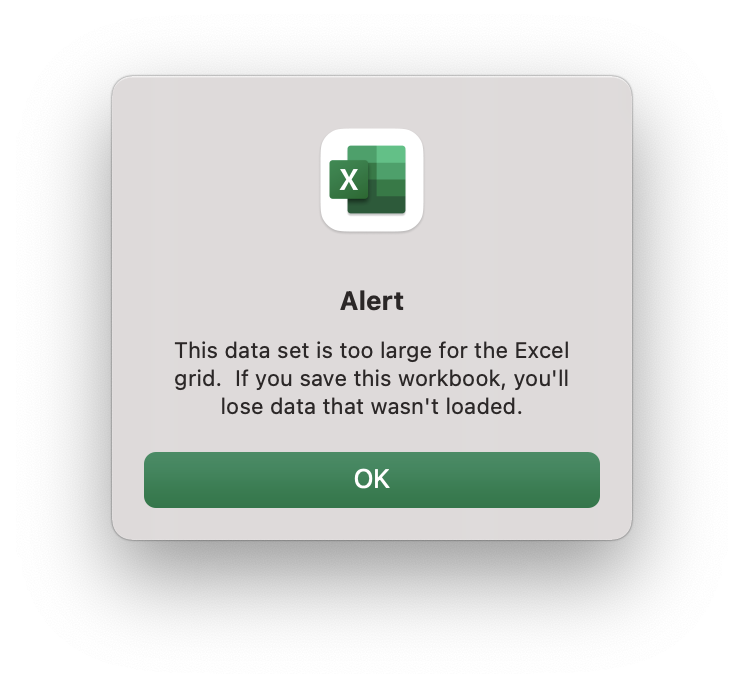

</details>

In [8]:
df.groupby('Agency')

In [9]:
df.groupby('Agency').count()  # not quite what we want

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
Agency,,,,,,,,,,,,,,,,,,,,,
DCA,34970,34970,34801,34970,34970,34970,11278,34768,34804,34769,...,0,0,0,0,0,0,0,34580,34580,34580
DEP,141653,141653,139561,141653,141653,141653,0,141201,124368,124368,...,0,0,0,0,0,0,0,140947,140947,140947
DFTA,2374,2374,2371,2374,2374,0,2374,1264,0,0,...,0,0,0,0,0,0,0,0,0,0
DHS,26733,26733,26407,26733,26733,0,0,26686,26692,26692,...,0,0,0,43,44,44,44,26435,26435,26435
DOB,85630,85630,85630,85630,85630,85630,0,84980,85630,85630,...,0,0,0,0,0,0,0,84980,84980,84980
DOE,1016,1016,831,1016,1016,1016,490,1009,1013,1009,...,0,0,0,0,0,0,0,1007,1007,1007
DOHMH,57276,57276,34027,57276,57276,56674,57269,56608,56625,56611,...,0,0,0,0,0,0,0,56258,56258,56258
DOITT,428,428,428,428,428,428,184,248,248,248,...,0,0,0,0,0,0,0,247,247,247
DOT,212549,212549,207939,212549,212549,212548,83698,166440,118258,118232,...,0,0,0,2880,2881,2876,2876,164381,164381,164381


In [10]:
counts = df.groupby(by=['Agency', 'Complaint Type']).count()['Unique Key']
counts

Agency  Complaint Type     
DCA     Consumer Complaint     34970
DEP     Air Quality             6375
        Asbestos                 794
        Hazardous Materials     2048
        Industrial Waste         613
                               ...  
TLC     Green Taxi Report         16
        Lost Property           3435
        Taxi Complaint          3523
        Taxi Compliment           58
        Taxi Report              426
Name: Unique Key, Length: 188, dtype: int64

In [11]:
pd.set_option('display.max_rows', counts.shape[0]+1)
# We need to update max rows shown.
# Note that this is a bit dangerous and can crash our browser if the number of rows is > 1000.

In [12]:
counts # What can we see from this data? Noise seems to be the main complaint! 

Agency                                   Complaint Type                         
DCA                                      Consumer Complaint                          34970
DEP                                      Air Quality                                  6375
                                         Asbestos                                      794
                                         Hazardous Materials                          2048
                                         Industrial Waste                              613
                                         Internal Code                                   3
                                         Lead                                         6729
                                         Noise                                       44788
                                         Plant                                          65
                                         Sewer                                       24695
         

In [13]:
df['Complaint Type Lower'] = df['Complaint Type'].str.lower()

In [14]:
df['Complaint Type Lower'].str.contains('noise') # a noise filter!

0          False
1           True
2           True
3           True
4           True
           ...  
2591265    False
2591266     True
2591267     True
2591268    False
2591269     True
Name: Complaint Type Lower, Length: 2591270, dtype: bool

In [15]:
df['Complaint Type Lower'].str.contains('noise').sum() / df.shape[0]  # New York City is a noisy place

# figuring out how to sell this is PRs job. "Because even if the city doesn't sleep, I do."

0.30957715714688167

In [16]:
def complaint_type_count(df_311: pd.DataFrame, complaint_type: str) -> int:
    """
    Return the number of complaints for a specific complaint_type within the dataframe.
    """
    # YOUR CODE HERE
    raise NotImplementedError()


In [17]:
### BEGIN TESTS
with rr.Wrap(complaint_type_count) as func:
    result = func(df, 'X-Ray Machine/Equipment')
    assert result == 65, result
### END TESTS

In [18]:
### BEGIN TESTS
with rr.Wrap(complaint_type_count) as func:
    result = func(df, 'Illegal Animal Kept as Pet')
    assert result == 475, result
### END TESTS

In [19]:
### BEGIN TESTS
with rr.Wrap(complaint_type_count) as func:
    result = func(df, 'Radioactive Material')
    assert result == 12, result
### END TESTS

### Export DataFrame

In [20]:
df_export = counts.reset_index()
df_export

,Agency,Complaint Type,Unique Key
0,DCA,Consumer Complaint,34970
1,DEP,Air Quality,6375
2,DEP,Asbestos,794
3,DEP,Hazardous Materials,2048
4,DEP,Industrial Waste,613
5,DEP,Internal Code,3
6,DEP,Lead,6729
7,DEP,Noise,44788
8,DEP,Plant,65
9,DEP,Sewer,24695


In [21]:
df_export.columns = ['Agency', 'Complaint Type', 'Count']  # let's relable the data columns
df_export.to_csv('noise-complaint-counts.csv', index=False)

<AxesSubplot:xlabel='Complaint Type'>

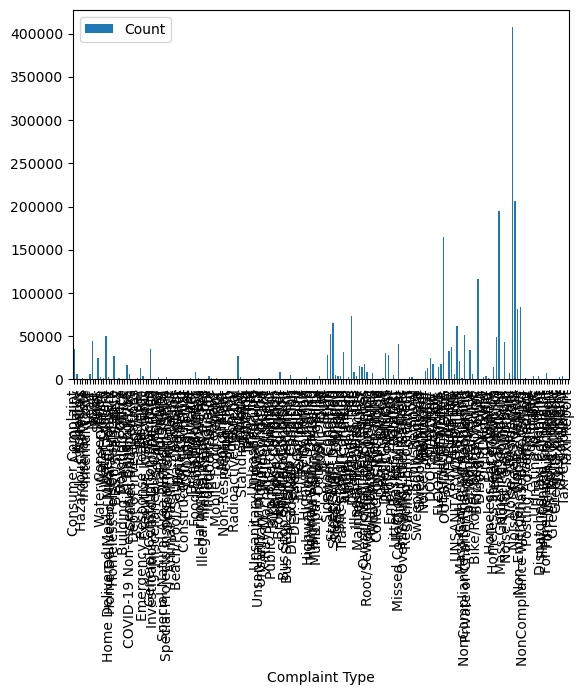

In [22]:
%matplotlib inline

df_export.plot(y='Count', x='Complaint Type', kind='bar')  # let's plot it

We could spend more time fiddling with this to get a clean bar chart but instead we'll wait until the next section where focus on plotting our data.